In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
means = [2.13, -99, 0.11, -1.01] # cztery zmienne z innymi średnimi

# Macierz kowariancji
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]])
print('Covariance matrix')
print(cov_matrix)

n=1000 # Liczba wierszy
df = np.random.multivariate_normal(means, cov_matrix, n)
print('Dataframe:')
print(df)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]
Dataframe:
[[   2.54296717  -98.67128527    0.74328019   -0.83291874]
 [   0.83414299 -100.38791813   -0.85029725   -1.5322399 ]
 [   3.42234518  -97.20911244    1.33986817    0.71728369]
 ...
 [   1.07315243 -100.20574695    0.30386271   -0.59038598]
 [   0.61079063 -100.72919811   -0.86506358   -2.66079196]
 [   3.52711098  -97.11103807    0.14797748   -0.78332241]]


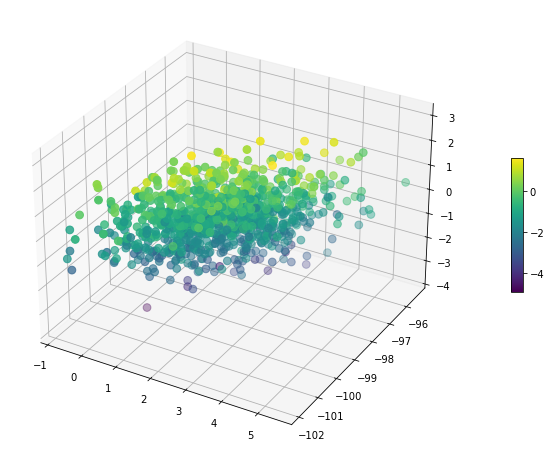

In [5]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=df[:,0], ys=df[:,1], zs=df[:,2], c=df[:,3], s=60)
cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02, ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)
plt.show()

In [6]:
print('Przed standaryzacją')
print('Średnia:\n',df.mean(axis=0))
print('Odchylenie standardowe:\n',df.std(axis=0))

# Standaryzacja
df_standardizated = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

print('\nPo standaryzacji')
print('Średnia:\n',df_standardizated.mean(axis=0))
print('Odchylenie standardowe:\n',df_standardizated.std(axis=0))

Przed standaryzacją
Średnia:
 [  2.13020924 -99.00331137   0.11546741  -1.01181012]
Odchylenie standardowe:
 [0.99084795 0.99376821 0.98248363 0.96851204]

Po standaryzacji
Średnia:
 [ 2.45403697e-15 -8.50615134e-14 -3.63875596e-17  6.34020614e-16]
Odchylenie standardowe:
 [1. 1. 1. 1.]


In [7]:
covariance_matrix = np.cov(df_standardizated.T)
covariance_matrix

array([[1.001001  , 0.9595402 , 0.06241492, 0.04210708],
       [0.9595402 , 1.001001  , 0.04224973, 0.03226857],
       [0.06241492, 0.04224973, 1.001001  , 0.86228251],
       [0.04210708, 0.03226857, 0.86228251, 1.001001  ]])

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Wartości własne:\n',eigenvalues,'\n\nWektory własne:\n',eigenvectors)

Wartości własne:
 [2.01390832 1.81016634 0.04106306 0.13886629] 

Wektory własne:
 [[-0.61047734 -0.35630664 -0.70665916 -0.03155672]
 [-0.60495335 -0.36659664  0.70552384  0.04329486]
 [-0.36637142  0.60445432  0.0432622  -0.70607035]
 [-0.35654009  0.61097255 -0.03158031  0.70611217]]


In [9]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)

[0.503, 0.452, 0.035, 0.01]


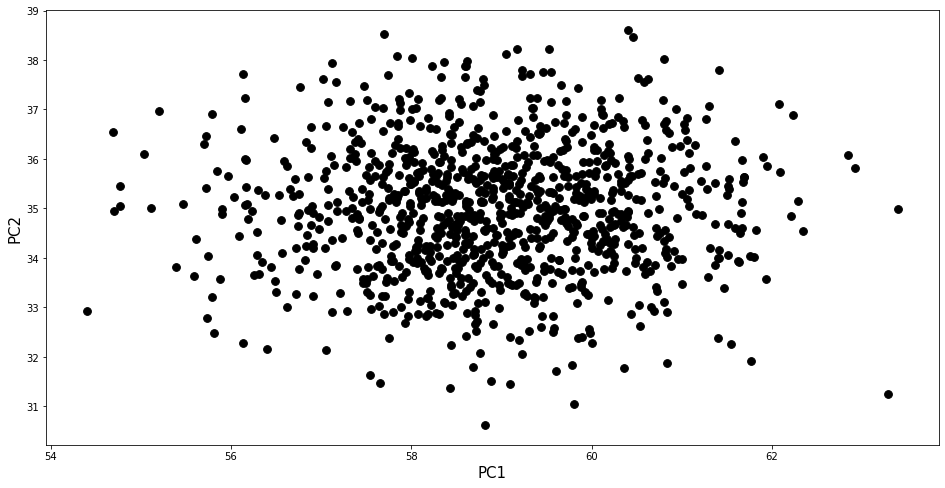

In [10]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)
w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = df.dot(w.T[0])
pc2 = df.dot(w.T[1])
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c='black', s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()